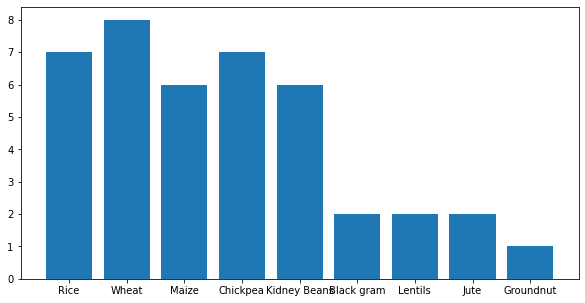

In [3]:
from tkinter import *
import pandas as pd    
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from openpyxl import load_workbook
main3 = Tk()
main3.geometry("600x600")
main3.configure(bg = "black")
font1 = ("times", 29, "bold")
font2 = ("times", 19, "bold")
font3 = ("times", 12, "bold")
excel_file = 'Data_users.xlsx'
df = pd.read_excel(excel_file)
id_password_dict = {}
id_crop_dict = {}
for index, row in df.iterrows():
    id_value = row['id']
    password_value = row['password']
    crop_value = row['crop']
    id_password_dict[id_value] = password_value
    id_crop_dict[id_value] = crop_value
def login():
    main3.title("Login Page")

    l1 = Label(main3, text = "LOGIN")
    l1.place(x = 200, y = 100)
    l1.configure(font = font1)

    l2 = Label(main3, text = "Login Id :  ")
    l2.place(x = 100, y = 200)
    l2.configure(font = font2)

    l3 = Label(main3, text = "Password :")
    l3.place(x = 100, y = 250)
    l3.configure(font = font2)

    t1 = Text(main3, height = 2, width = 20)
    t1.place(x = 240, y = 200)

    t2 = Text(main3, height = 2, width = 20)
    t2.place(x = 240, y = 250)
    
    def main_page(now_user_id):
        main3.destroy()
        main2 = Tk()
        main2.geometry("600x600")
        main2.configure(bg = "black")
        main2.title("Home Page")
        def Crop_using_Budget():
            data = pd.read_csv("Crop_Predict.csv")
            label_encoder = preprocessing.LabelEncoder()
            soil_1 = list(data['Soil_type'])
            seas_1 = list(data['Season'])
            data['Soil_type']= label_encoder.fit_transform(data['Soil_type'])
            data['Soil_type'].unique()
            data['Season']= label_encoder.fit_transform(data['Season'])
            data['Season'].unique()
            soil_2 = list(data['Soil_type'])
            seas_2 = list(data['Season'])
            x=data.iloc[:,:-1].values
            y=data.iloc[:,-1].values
            Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2)
            Reg=LogisticRegression()
            Reg.fit(Xtrain,Ytrain)
            pred = Reg.predict(Xtest)
            main = Tk()
            main.geometry("800x800")
            main.title("Crop Predictor")
            main.configure(bg = "black")
            font1 = ("times", 25, "bold")
            font2 = ("times", 15, "bold")
            l = Label(main, text = "Crop Predictor")
            l.place(x = 290, y = 20)
            l.configure(font = font1)
    
            l1 = Label(main, text = 'Nitrogen Value: ')
            l1.place(x = 100, y = 80)
            t1 = Text(main, height = 1, width = 10)
            t1.place(x = 300,  y = 80)
        
            l2 = Label(main, text = 'Phosphorous Value:')
            l2.place(x = 100, y = 120)
            t2 = Text(main, height = 1, width = 10)
            t2.place(x = 300,  y = 120)
        
            l3 = Label(main, text = 'Potassium Value:')
            l3.place(x = 100, y = 160)
            t3 = Text(main, height = 1, width = 10)
            t3.place(x = 300,  y = 160)
        
            l4 = Label(main, text = 'Temperature')
            l4.place(x = 100, y = 200)
            t4 = Text(main, height = 1, width = 10)
            t4.place(x = 300,  y = 200)
        
            l5 = Label(main, text = 'Humidity:')
            l5.place(x = 100, y = 240)
            t5 = Text(main, height = 1, width = 10)
            t5.place(x = 300,  y = 240)
        
            l6 = Label(main, text = 'PH Value:')
            l6.place(x = 100, y = 280)
            t6 = Text(main, height = 1, width = 10)
            t6.place(x = 300,  y = 280)
    
            l7 = Label(main, text = 'Rainfall:')
            l7.place(x =100, y = 320)
            t7 = Text(main, height = 1, width = 10)
            t7.place(x = 300,  y = 320)
    
            l8 = Label(main, text = 'Soil Type:')
            l8.place(x = 100, y = 360)
            t8 = Text(main, height = 1, width = 10)
            t8.place(x = 300,  y = 360)
            l8_1 = Label(main, text = "Select Soil_type:")
            l8_1.configure(font = font2)
            l8_1.place(x = 450, y = 100)
            l8_ = Label(main, text = "1 - Alluvial\n2 - Black\n3 - Red & Yellow\n4 - Clay\n5- Sandy\n6 - Loam\n7 - Laterite\n8 - Mountain and Forest")
            l8_.place(x = 450, y = 140)
        
            l9 = Label(main, text = 'Season:')
            l9.place(x = 100, y = 400)
            t9 = Text(main, height = 1, width = 10)
            t9.place(x = 300,  y = 400)
            l9_1 = Label(main, text = "Select Season:   ")
            l9_1.configure(font = font2)
            l9_1.place(x = 450, y = 300)
            l9 = Label(main, text = "1 - Kharif(June - Octomber)\n2 - Rabi(November - April)\n3 - Zaid(March - June)")
            l9.place(x = 450, y = 340)
            
            l10 = Label(main, text = 'Budget:')
            l10.place(x = 100, y = 440)
            t10 = Text(main, height = 1, width = 10)
            t10.place(x = 300,  y = 440)
    
            def predict(n, p, k, temp, humid, ph, rain, soil, seas, budg):
                ans = Reg.predict([[n, p, k, temp, humid, ph, rain, soil, seas, budg]])
                return ans
            def predictor():
                soils = ['', 'Alluvial', 'Black', 'Red & Yellow', 'Clay', 'Sandy', 'Loam', 'Laterite', 'Mountain and Forest']
                seasons = ['', 'Kharif(June - Octomber)', 'Rabi(November - April)', 'Zaid(March - June)']
                ans = predict(float(t1.get("1.0", "end-1c")), float(t2.get("1.0", "end-1c")), float(t3.get("1.0", "end-1c")), float(t4.get("1.0", "end-1c")), float(t5.get("1.0", "end-1c")), float(t6.get("1.0", "end-1c")), float(t7.get("1.0", "end-1c")), soil_2[soil_1.index(soils[int(t8.get("1.0", "end-1c"))])],  seas_2[seas_1.index(seasons[int(t9.get("1.0", "end-1c"))])], float(t10.get("1.0", "end-1c")))
                ans = "Suitable crop is : " + ans
                lab = Label(main, text = ans)
                lab.configure(font = font1)
                lab.place(x = 200, y = 600)
            b1 = Button(main, command = predictor, text = "Predict")
            b1.configure(font = font2)
            b1.place(x = 100, y = 500)
            
            def reset():
                t1.delete(1.0, END)
                t2.delete(1.0, END)
                t3.delete(1.0, END)
                t4.delete(1.0, END)
                t5.delete(1.0, END)
                t6.delete(1.0, END)
                t7.delete(1.0, END)
                t8.delete(1.0, END)
                t9.delete(1.0, END)
                t10.delete(1.0, END)
            b2 = Button(main, command = reset, text = "Reset")
            b2.configure(font = font2)
            b2.place(x = 250, y = 500)
            main.mainloop()
        b11 = Button(main2, command = Crop_using_Budget, text = "Predict Crop Using Budget")
        b11.place(x = 150, y = 200)
        b11.configure(font = font2)
        def Crop_on_demand():
            main4 = Tk()
            main4.geometry("1000x600")
            main4.configure(bg = "black")
            main4.title("Crop Based on Need")
            excel_file = 'Data_users.xlsx'
            df = pd.read_excel(excel_file)
            id_password_dict = {}
            id_crop_dict = {}
            for index, row in df.iterrows():
                id_value = row['id']
                password_value = row['password']
                crop_value = row['crop']
                id_password_dict[id_value] = password_value
                id_crop_dict[id_value] = crop_value
            x = list(id_crop_dict.values())
            crops_graph = {"Rice" : 0, "Wheat" : 0, "Maize" : 0, "Chickpea" : 0, "Kidney Beans" : 0, "Black gram" : 0, "Lentils" : 0, "Jute" : 0, "Groundnut" : 0}
            for i in crops_graph.keys():
                if(i in x):
                    crops_graph[i] = x.count(i)
            x = list(crops_graph.keys())
            y = list(crops_graph.values())
            fig = plt.figure(figsize = (10, 5))
            ax = fig.add_subplot(111)
            ax.bar(x, y)
            canvas = FigureCanvasTkAgg(fig, master = main4)
            canvas.draw()
            canvas.get_tk_widget().pack()
            l11 = Label(main4, text = "The Crops grown by others!\nThe Least Grown Crop has High Demand")
            l11.place(x = 250, y = 400)
            l11.configure(font = font1)
            """plt.bar(x, y, color = 'maroon', width = 0.4)
            plt.xlabel("Crops")
            plt.ylabel("Currently Growing")
            plt.title("Choose the best Crop")
            x = plt.show
            print(x)
            label = Label(main4, image = x)
            label.pack()"""
            main4.mainloop()
        b12 = Button(main2, command = Crop_on_demand, text = "Predict Crop based on Demand")
        b12.place(x = 120, y = 300)
        b12.configure(font = font2)
        def Update_crop():
            main4 = Tk()
            main4.geometry("600x600")
            main4.configure(bg = 'black')
            l14 = Label(main4, text = "Your current crop : ")
            l14.place(x = 100, y = 50)
            l14.configure(font = font1)
            
            workbook = load_workbook(filename="Data_users.xlsx")
            sheet = workbook["Sheet1"]
            dataframe = pd.read_excel("Data_users.xlsx")
            row_number = dataframe[dataframe["id"] == now_user_id].index.to_numpy()
            index = "C" + str(int(list(row_number)[0])+2)
            
            l24 = Label(main4, text = sheet[index].value)
            l24.place(x = 120, y = 120)
            l24.configure(font = font1)
            
            l34 = Label(main4, text = "Enter current Crop : ")
            l34.place(x = 100, y = 200)
            l34.configure(font = font1)
            
            t14 = Text(main4, height = 2, width = 20)
            t14.place(x = 100, y = 300)
            def change():
                sheet[index] = t14.get("1.0", "end-1c")
                workbook.save(filename="Data_users.xlsx")
                main4.destroy()
            
            b14 = Button(main4, command = change, text = "Change")
            b14.place(x = 150, y = 350)
            b14.configure(font = font2)

            main4.mainloop()
            
            
        b13 = Button(main2, command = Update_crop, text = "Update Current Crop")
        b13.place(x = 150, y = 400)
        b13.configure(font = font2)
        main2.mainloop()
    def Login_Check():
        login_id = t1.get("1.0", "end-1c")
        password = t2.get("1.0", "end-1c")
        
        if(login_id in id_password_dict.keys()):
            if(id_password_dict[login_id] == password):
                now_user_id = login_id 
                main_page(now_user_id)
            else:
                l3 = Label(main3, text = "Invalid Password!")
                l3.configure(font = font2)
                l3.configure(bg = "black")
                l3.place(x = 150, y = 340)
        else:
            l3 = Label(main3, text = "No Login Id available!")
            l3.configure(font = font2)
            l3.configure(bg = "black")
            l3.place(x = 150, y = 340)
    b1 = Button(main3, command = Login_Check, text = "Login")
    b1.place(x = 200, y = 300)
    b1.configure(font = font2)
    
    def new_User():
        main4 = Tk()
        main4.geometry("600x600")
        main4.configure(bg = "black")
        main4.title("New User")
        l2 = Label(main4, text = "Login Id :  ")
        l2.place(x = 100, y = 200)
        l2.configure(font = font2)

        l3 = Label(main4, text = "Password :")
        l3.place(x = 100, y = 250)
        l3.configure(font = font2)
        
        l4 = Label(main4, text = "Crop :")
        l4.place(x = 100, y = 300)
        l4.configure(font = font2)

        t1 = Text(main4, height = 2, width = 20)
        t1.place(x = 240, y = 200)

        t2 = Text(main4, height = 2, width = 20)
        t2.place(x = 240, y = 250)
        
        t3 = Text(main4, height = 2, width = 20)
        t3.place(x = 240, y = 300)
        
        def add_new_user():
            login_id = t1.get("1.0", "end-1c")
            password = t2.get("1.0", "end-1c")
            crop = t3.get("1.0", "end-1c")
            if(login_id in id_password_dict.keys()):
                l4 = Label(main4, text = "User Id already exists!")
                l4.place(x = 300, y = 450)
                l4.configure(font = font2)
            else:
                df1 = pd.read_excel("Data_users.xlsx")
                df = {'id' : [login_id], 'password' : [password], 'crop' : [crop]}
                df = pd.DataFrame.from_dict(df) 
                print(type(df1))
                print(type(df))
                df1 = pd.concat([df1, df])
                df1.to_excel("Data_users.xlsx",index=False)
                new_user_id = login_id
                main4.destroy()
                main_page("")
        b1 = Button(main4, command = add_new_user, text = "Create")
        b1.place(x = 200, y = 400)
        b1.configure(font = font2)
        main4.mainloop()
    b2 = Button(main3, command = new_User, text = "New User? Click here")
    b2.place(x = 300, y = 400)
    b2.configure(font = font2)
    main3.mainloop()
login()